In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/schizohealth-dataset/schizophrenia_dataset.csv


In [2]:
#Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
dataset = pd.read_csv("/kaggle/input/schizohealth-dataset/schizophrenia_dataset.csv")
dataset.head()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [4]:
#renaming the columns 
dataset.rename(columns={"Hasta_ID":"Patient_ID",
                        "Yaş":"Age",
                        "Cinsiyet":"Gender",
                        "Eğitim_Seviyesi":"Education_level",
                       "Medeni_Durum":"Marital_Status",
                       "Meslek":"Occupation",
                       "Gelir_Düzeyi":"Income_level",
                       "Yaşadığı_Yer":"Living_Area",
                       "Tanı":"Diagnosis",
                       "Hastalık_Süresi":"Disease_Duration",
                       "Hastaneye_Yatış_Sayısı":"Hospitalizations",
                       "Ailede_Şizofreni_Öyküsü":"Family_History",
                       "Madde_Kullanımı":"Substance_Use",
                       "İntihar_Girişimi":"Suicide_Attempt",
                       "Pozitif_Semptom_Skoru":"Positive_Symptom_Score",
                       "Negatif_Semptom_Skoru":"Negative_Symptom_Score",
                       "GAF_Skoru":"GAF_Score",
                       "Sosyal_Destek":"Social_Support",
                       "Stres_Faktörleri":"Stress_Factors",
                       "İlaç_Uyumu":"Medication_Adherence"}
                       ,inplace = True)

In [5]:
dataset.head()

,Patient_ID,Age,Gender,Education_level,Marital_Status,Occupation,Income_level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_Use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [6]:
#inspecting basic properties like datatypes and dataset size using info method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Patient_ID              10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education_level         10000 non-null  int64
 4   Marital_Status          10000 non-null  int64
 5   Occupation              10000 non-null  int64
 6   Income_level            10000 non-null  int64
 7   Living_Area             10000 non-null  int64
 8   Diagnosis               10000 non-null  int64
 9   Disease_Duration        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_History          10000 non-null  int64
 12  Substance_Use           10000 non-null  int64
 13  Suicide_Attempt         10000 non-null  int64
 14  Positive_Symptom_Score  10000 non-null  int64
 15  Negative_Symptom_Sco

The catagorical colums are already encoded to int datatype.

In [7]:
#inspecting missing values 
dataset.isnull().sum()

Patient_ID                0
Age                       0
Gender                    0
Education_level           0
Marital_Status            0
Occupation                0
Income_level              0
Living_Area               0
Diagnosis                 0
Disease_Duration          0
Hospitalizations          0
Family_History            0
Substance_Use             0
Suicide_Attempt           0
Positive_Symptom_Score    0
Negative_Symptom_Score    0
GAF_Score                 0
Social_Support            0
Stress_Factors            0
Medication_Adherence      0
dtype: int64

No missing values are present in the dataset.

In [8]:
#for anaylsis dividing dataset into numerical and categorical columns
numerical = dataset[["Patient_ID","Age","Disease_Duration","Hospitalizations","Positive_Symptom_Score",
                     "Negative_Symptom_Score","GAF_Score"]]
categorical = dataset[[i for i in dataset.columns if i not in numerical.columns]]

In [9]:
numerical.head()

,Patient_ID,Age,Disease_Duration,Hospitalizations,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score
0,1,72,0,0,32,48,72
1,2,49,35,1,51,63,40
2,3,53,32,0,72,85,51
3,4,67,0,0,10,21,74
4,5,54,0,0,4,27,98


In [10]:
categorical.head()

,Gender,Education_level,Marital_Status,Occupation,Income_level,Living_Area,Diagnosis,Family_History,Substance_Use,Suicide_Attempt,Social_Support,Stress_Factors,Medication_Adherence
0,1,4,2,0,2,1,0,0,0,0,0,2,2
1,1,5,2,2,1,0,1,1,1,1,2,2,0
2,1,5,3,2,1,0,1,1,0,0,0,1,1
3,1,3,2,0,2,0,0,0,1,0,1,1,2
4,0,1,2,0,2,1,0,0,0,0,0,1,0


## EDA

In [11]:
numerical.describe()

,Patient_ID,Age,Disease_Duration,Hospitalizations,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,5000.50000,48.867700,5.859000,1.440300,39.019000,39.4614,67.031800
std,2886.89568,18.215054,11.066814,2.824152,27.276962,27.0175,23.999833
min,1.00000,18.000000,0.000000,0.000000,0.000000,0.0000,10.000000
25%,2500.75000,33.000000,0.000000,0.000000,17.000000,18.0000,54.000000
50%,5000.50000,49.000000,0.000000,0.000000,35.000000,35.0000,72.000000
75%,7500.25000,65.000000,5.250000,1.000000,57.000000,57.0000,86.000000
max,10000.00000,80.000000,40.000000,10.000000,100.000000,100.0000,100.000000


In [12]:
#encoding some of the numerical columns into categories for analysis by use of function
def encoding(column,lim1,lim2,lim3,lim4,category1,category2,category3,category4):
    for i in numerical_encoded[column]:
        if i in list(range(lim1,lim2)):
            numerical_encoded[column].replace(i,category1,inplace=True)
        elif i in list(range(lim2,lim3)):
            numerical_encoded[column].replace(i,category2,inplace=True)
        elif i in list(range(lim3,lim4)):
            numerical_encoded[column].replace(i,category3,inplace=True)
        else:
            numerical_encoded[column].replace(i,category4,inplace=True)

In [13]:
numerical_encoded = pd.DataFrame()
numerical_encoded["Disease_Duration_encoded"] = numerical["Disease_Duration"]
numerical_encoded["Positive_Symptom_Score_encoded"] = numerical["Positive_Symptom_Score"]
numerical_encoded["Negative_Symptom_Score_encoded"] = numerical["Negative_Symptom_Score"]
numerical_encoded["GAF_Score_encoded"] = numerical["GAF_Score"]
numerical_encoded["Age_encoded"] = numerical["Age"]
numerical_encoded["Hospitalizations_encoded"] = numerical["Hospitalizations"]
encoding("Disease_Duration_encoded",0,11,21,31,"0-10 years","11-20 years","21-30 years","31-40 years")
encoding("Positive_Symptom_Score_encoded",0,26,51,76,"0-25 score","26-50 score","51-75 score","76-100 score")
encoding("Negative_Symptom_Score_encoded",0,26,51,76,"0-25 score","26-50 score","51-75 score","76-100 score")
encoding("GAF_Score_encoded",0,26,51,76,"0-25 score","26-50 score","51-75 score","76-100 score")
encoding("Age_encoded",0,21,41,61,"18-20 years","21-40 years","41-60 years","61-80 years")
encoding("Hospitalizations_encoded",0,3,6,9,"0-2 times","3-5 times","6-8 times","8-10 times")

In [14]:
numerical.head()

,Patient_ID,Age,Disease_Duration,Hospitalizations,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score
0,1,72,0,0,32,48,72
1,2,49,35,1,51,63,40
2,3,53,32,0,72,85,51
3,4,67,0,0,10,21,74
4,5,54,0,0,4,27,98


In [15]:
def encoded_columns_value_counts(col):
    print(numerical_encoded[col].value_counts() / len(numerical) * 100)

In [16]:
for i in numerical_encoded.columns:
    encoded_columns_value_counts(i)

Disease_Duration_encoded
0-10 years     78.29
11-20 years     7.47
21-30 years     7.30
31-40 years     6.94
Name: count, dtype: float64
Positive_Symptom_Score_encoded
0-25 score      36.95
26-50 score     34.71
76-100 score    14.26
51-75 score     14.08
Name: count, dtype: float64
Negative_Symptom_Score_encoded
0-25 score      36.03
26-50 score     35.73
76-100 score    14.34
51-75 score     13.90
Name: count, dtype: float64
GAF_Score_encoded
76-100 score    43.21
51-75 score     33.78
26-50 score     13.75
0-25 score       9.26
Name: count, dtype: float64
Age_encoded
21-40 years    32.48
61-80 years    32.04
41-60 years    30.63
18-20 years     4.85
Name: count, dtype: float64
Hospitalizations_encoded
0-2 times     79.00
6-8 times      7.98
3-5 times      7.80
8-10 times     5.22
Name: count, dtype: float64


* Approx 96% of the patients in the dataset are above 20 years of age with majority of around 21-40 and 61-80 years.
* Approx 79% of the patients have either not hospitalized or admitted less than 2 times.
* Approx 78% patients have their schizophrenia duration less than 10 years out of which many patients have duration less than a year.
* Approx 72% patients doesn't experience positive symptoms of schizophrenia.
* Around 72% patients have less negative symptoms of schizophrenia.
* Around 78% patients which have schizophrenia doesn't affect their mental functionality.
* Seems like the majority of patients having schizophrenia is not of acute stage or any skew of data is there.
  

Patient_ID
Skew : 0.0


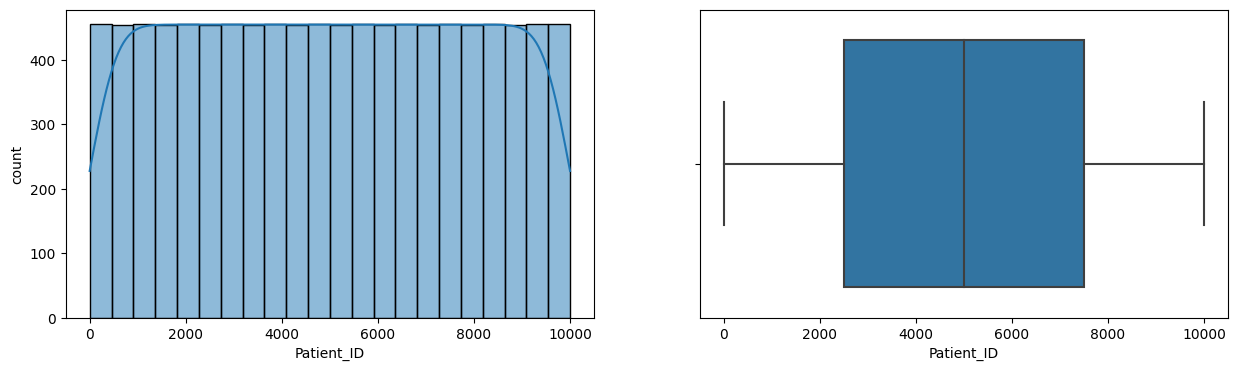

Age
Skew : 0.01


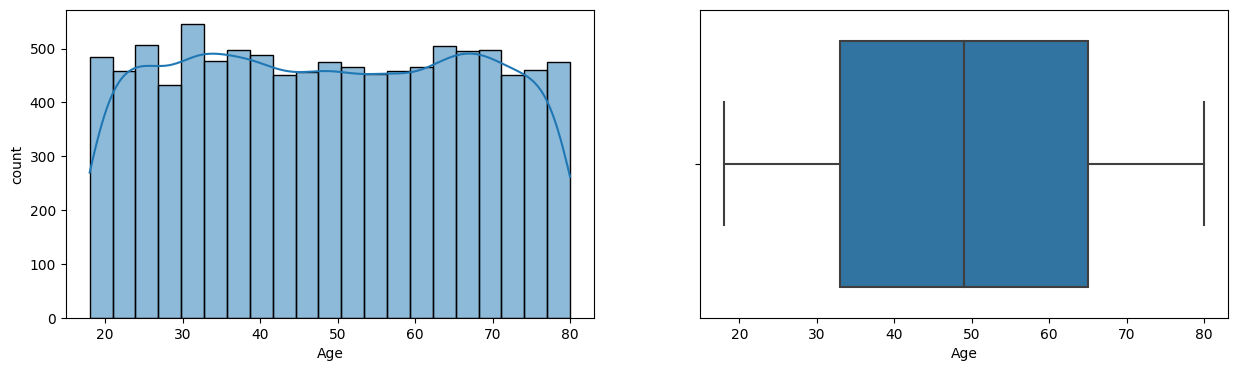

Disease_Duration
Skew : 1.74


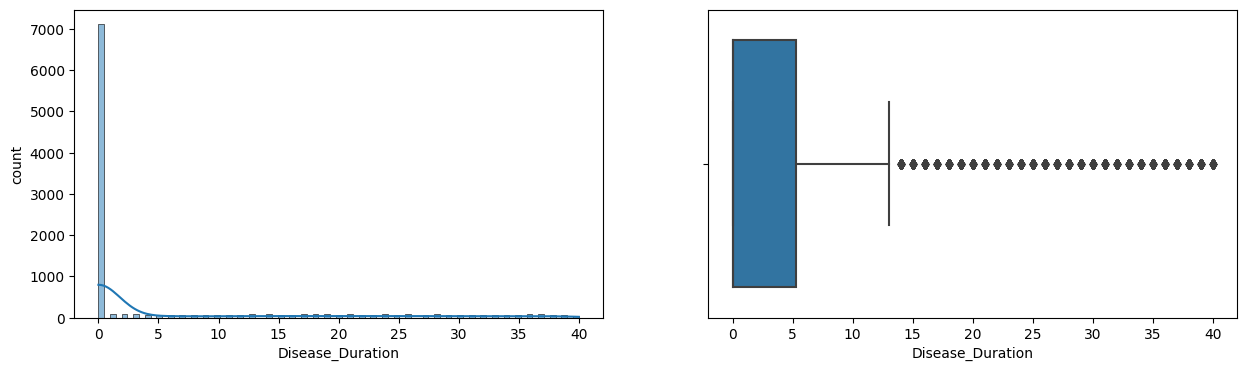

Hospitalizations
Skew : 1.83


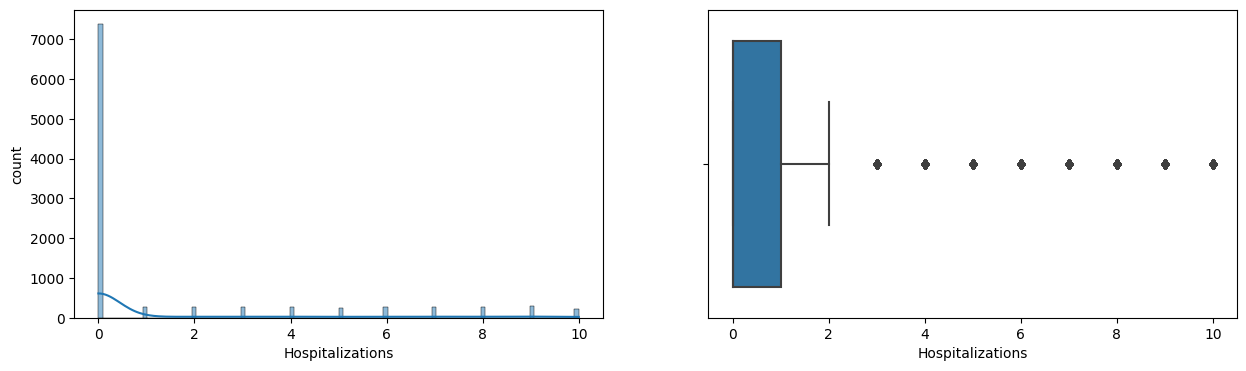

Positive_Symptom_Score
Skew : 0.58


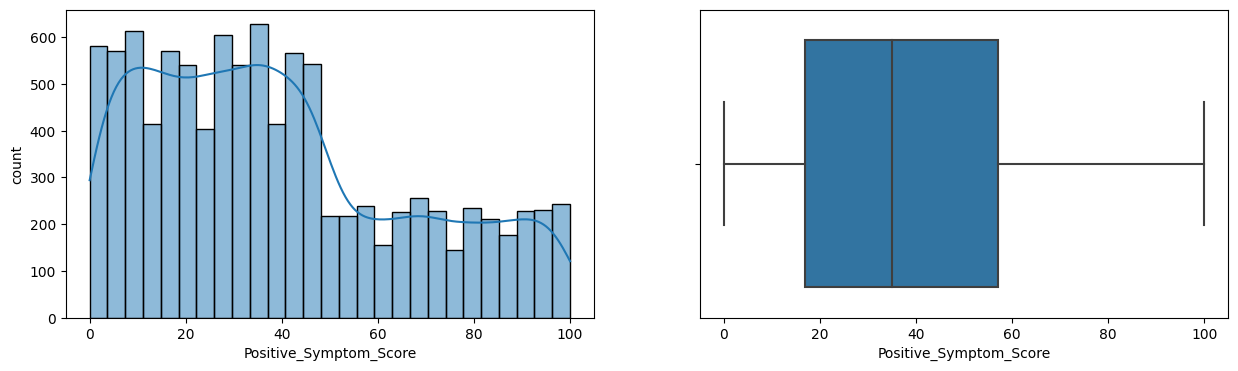

Negative_Symptom_Score
Skew : 0.57


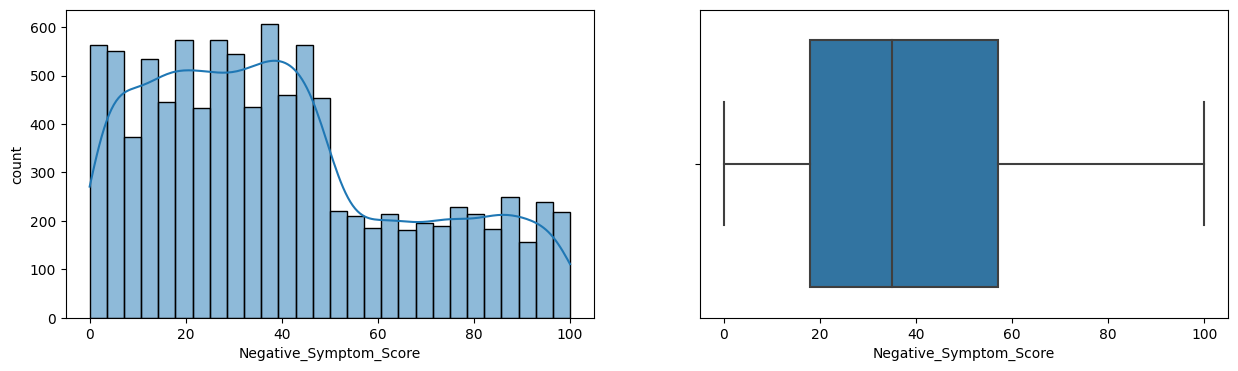

GAF_Score
Skew : -0.72


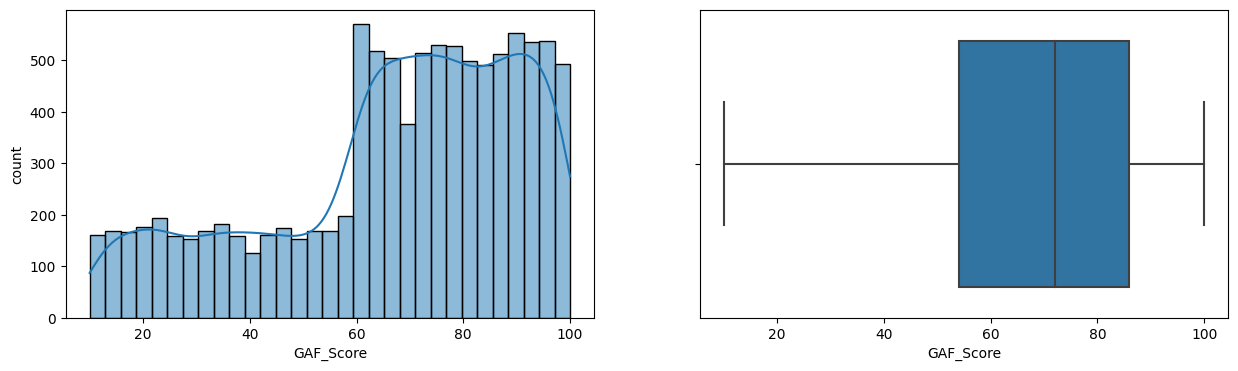

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical.columns:
    print(col)
    print('Skew :', round(numerical[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[col],kde=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numerical[col])
    plt.show()

* Disease_Duration and hospitalizations have outliers.
* Positive_Symptom_Score and Negative_Symptom_Score are slightly right skewed but with no outliers.
* GAF_Score is slightly left skewed with no outliers.

In [18]:
#encoding of categorical columns for analysis
categorical["Gender"].replace({1:"Male",0:"Female"},inplace=True)
categorical["Education_level"].replace({1: "Primary", 2: "Middle School", 3: "High School", 
                                        4: "University", 5: "Postgraduate"},inplace=True)
categorical["Marital_Status"].replace({0: "Single", 1: "Married", 2: "Divorced", 3: "Widowed"},
                                     inplace=True)
categorical["Occupation"].replace({0: "Unemployed", 1: "Employed", 2: "Retired", 3: "Student"},
                                 inplace=True)
categorical["Income_level"].replace({0: "Low", 1: "Medium", 2: "High"},inplace=True)
categorical["Living_Area"].replace({0: "Rural", 1: "Urban"},inplace=True)
categorical["Diagnosis"].replace({0: "Not schizophrenic", 1: "Schizophrenic"},inplace=True)
categorical["Family_History"].replace({ 0: "No", 1: "Yes"},inplace=True)
categorical["Substance_Use"].replace({ 0: "No", 1: "Yes"},inplace=True)
categorical["Suicide_Attempt"].replace({0: "No", 1: "Yes"},inplace=True)
categorical["Social_Support"].replace({0: "Low", 1: "Medium", 2: "High"},inplace=True)
categorical["Stress_Factors"].replace({0: "Low", 1: "Medium", 2: "High"},inplace=True)
categorical["Medication_Adherence"].replace({ 0: "Poor", 1: "Moderate", 2: "Good"},inplace=True)

In [19]:
categorical.head()

,Gender,Education_level,Marital_Status,Occupation,Income_level,Living_Area,Diagnosis,Family_History,Substance_Use,Suicide_Attempt,Social_Support,Stress_Factors,Medication_Adherence
0,Male,University,Divorced,Unemployed,High,Urban,Not schizophrenic,No,No,No,Low,High,Good
1,Male,Postgraduate,Divorced,Retired,Medium,Rural,Schizophrenic,Yes,Yes,Yes,High,High,Poor
2,Male,Postgraduate,Widowed,Retired,Medium,Rural,Schizophrenic,Yes,No,No,Low,Medium,Moderate
3,Male,High School,Divorced,Unemployed,High,Rural,Not schizophrenic,No,Yes,No,Medium,Medium,Good
4,Female,Primary,Divorced,Unemployed,High,Urban,Not schizophrenic,No,No,No,Low,Medium,Poor


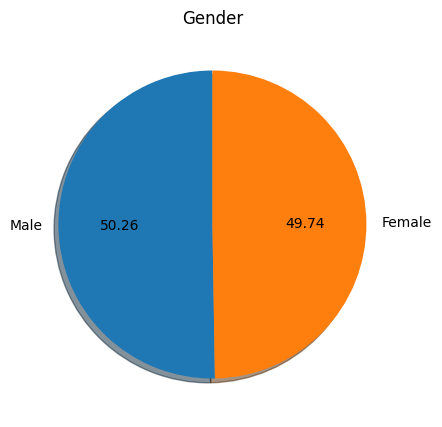

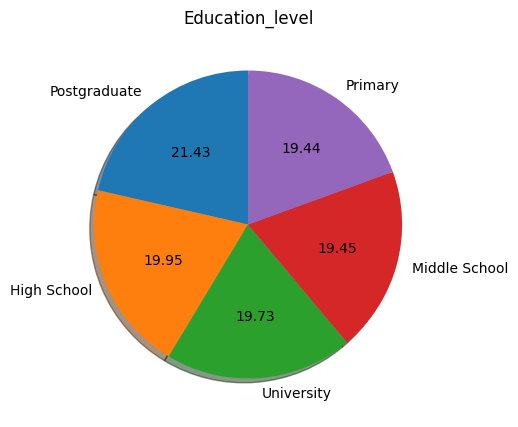

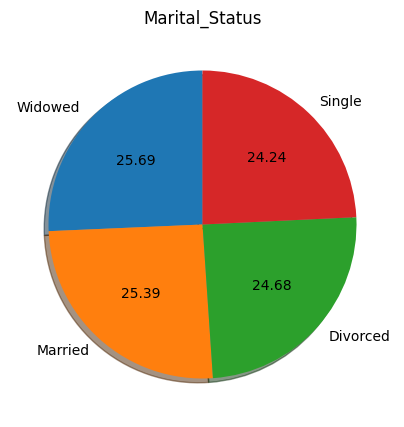

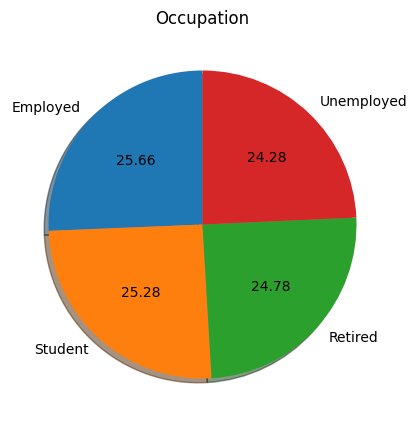

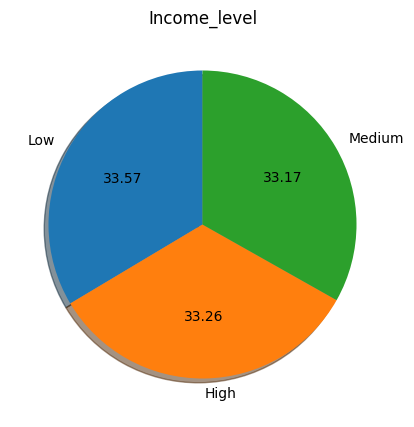

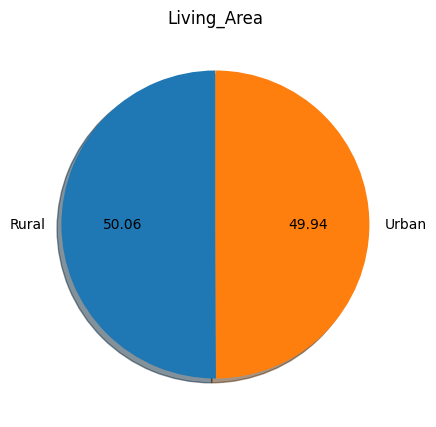

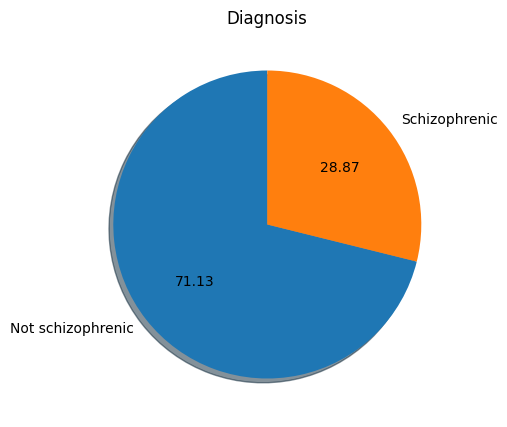

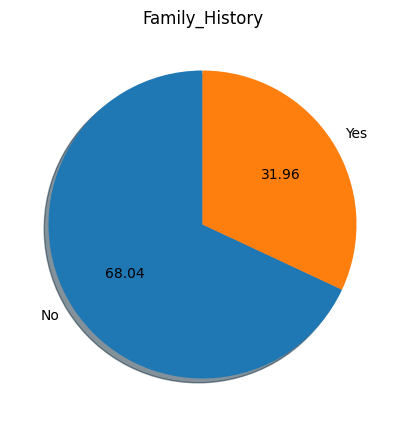

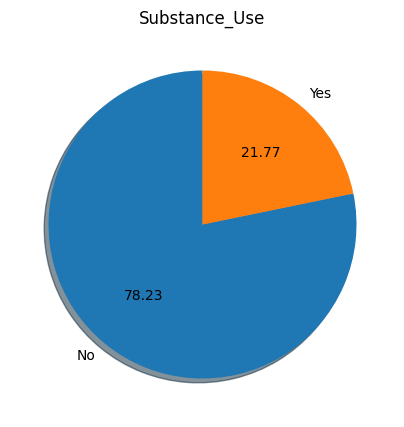

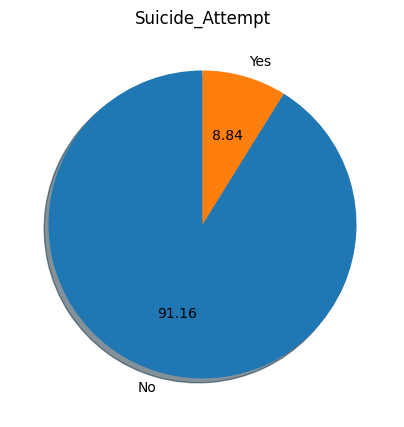

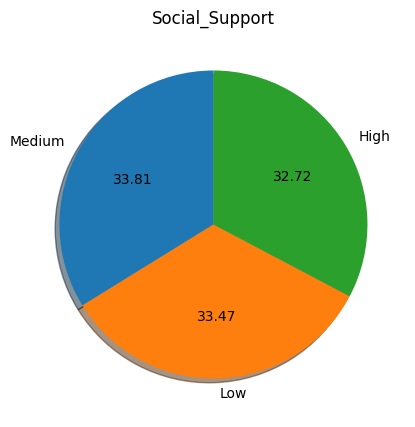

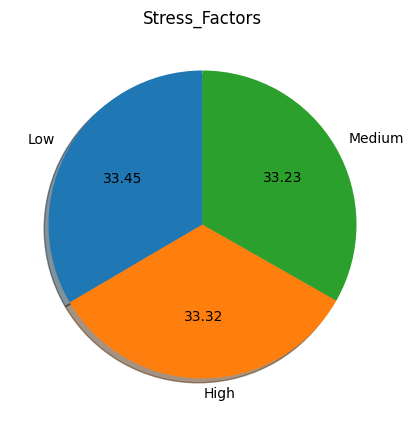

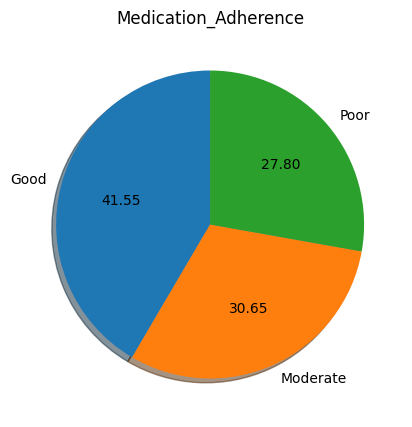

In [20]:
for i in categorical.columns:
        plt.figure(figsize=(5,5))
        plt.pie(categorical[i].value_counts(),startangle=90,
        labels=categorical[i].value_counts().index.tolist(),autopct="%.2f",shadow=True)
        plt.title(i)

* Columns gender,education_level,marital_status,occupation,Income_level,Living_Area,Social_Support and Stress_Factors have almost equivalent proportion of their values.
* Approx 71% of the patient data are classified as not schizophrenic so there is imbalance in dataset.
* Approx 68% of the patients don't have family history of this disease.
* Approx 78% of the patients don't consume tobacco,alcohol or other substances.
* Approx 91% of the patients haven't gone through suicidal route.
* Approx 72% of the patients are following good or moderate adherence to medications.
  

In [21]:
def bivariate_analysis_categorical(i):
    col=pd.crosstab(categorical[i],categorical["Diagnosis"],margins=True)["All"]
    return pd.crosstab(categorical[i],categorical["Diagnosis"]).divide(col,axis=0).dropna()

In [22]:
bivariate_analysis_categorical("Gender")

Diagnosis,Not schizophrenic,Schizophrenic
Gender,,
Female,0.713309,0.286691
Male,0.709312,0.290688


In [23]:
bivariate_analysis_categorical("Education_level")

Diagnosis,Not schizophrenic,Schizophrenic
Education_level,,
High School,0.715288,0.284712
Middle School,0.711054,0.288946
Postgraduate,0.720485,0.279515
Primary,0.711934,0.288066
University,0.696908,0.303092


In [24]:
bivariate_analysis_categorical("Marital_Status")

Diagnosis,Not schizophrenic,Schizophrenic
Marital_Status,,
Divorced,0.703404,0.296596
Married,0.712485,0.287515
Single,0.720297,0.279703
Widowed,0.709225,0.290775


In [25]:
bivariate_analysis_categorical("Occupation")

Diagnosis,Not schizophrenic,Schizophrenic
Occupation,,
Employed,0.698753,0.301247
Retired,0.712268,0.287732
Student,0.715190,0.284810
Unemployed,0.719522,0.280478


In [26]:
bivariate_analysis_categorical("Income_level")

Diagnosis,Not schizophrenic,Schizophrenic
Income_level,,
High,0.717679,0.282321
Low,0.705987,0.294013
Medium,0.710280,0.289720


In [27]:
bivariate_analysis_categorical("Living_Area")

Diagnosis,Not schizophrenic,Schizophrenic
Living_Area,,
Rural,0.700559,0.299441
Urban,0.722066,0.277934


In [28]:
bivariate_analysis_categorical("Social_Support")

Diagnosis,Not schizophrenic,Schizophrenic
Social_Support,,
High,0.712103,0.287897
Low,0.708097,0.291903
Medium,0.713694,0.286306


In [29]:
bivariate_analysis_categorical("Stress_Factors")

Diagnosis,Not schizophrenic,Schizophrenic
Stress_Factors,,
High,0.709784,0.290216
Low,0.707922,0.292078
Medium,0.716220,0.283780


Columns gender,education_level,marital_status,occupation,Income_level,Living_Area,Social_Support and Stress_Factors have almost equivalent proportion of their values and have no affect on a person being schizophrenic or not.

In [30]:
bivariate_analysis_categorical("Family_History")

Diagnosis,Not schizophrenic,Schizophrenic
Family_History,,
No,0.832598,0.167402
Yes,0.453066,0.546934


Those patients who have schizoprenia in family are more likely prone to the disease.

In [31]:
bivariate_analysis_categorical("Substance_Use")

Diagnosis,Not schizophrenic,Schizophrenic
Substance_Use,,
No,0.774639,0.225361
Yes,0.483693,0.516307


Those patients who consume different substances like tobacco,alcohol etc. are prone to disease.

In [32]:
bivariate_analysis_categorical("Suicide_Attempt")

Diagnosis,Not schizophrenic,Schizophrenic
Suicide_Attempt,,
No,0.780276,0.219724
Yes,0.000000,1.000000


Mostly people who are schizophrenic or not they don't attempt suicide.

In [33]:
bivariate_analysis_categorical("Medication_Adherence")

Diagnosis,Not schizophrenic,Schizophrenic
Medication_Adherence,,
Good,0.865463,0.134537
Moderate,0.706362,0.293638
Poor,0.486331,0.513669


People who are following treatment and taking medicines in a proper way are less prone to schizophrenia compared to people who have a moderate or poor attitude towards medicinal treatment.


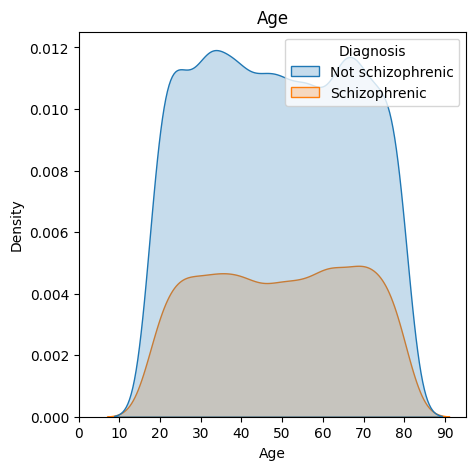

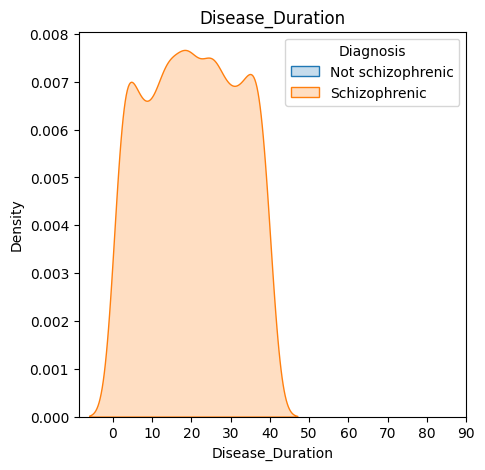

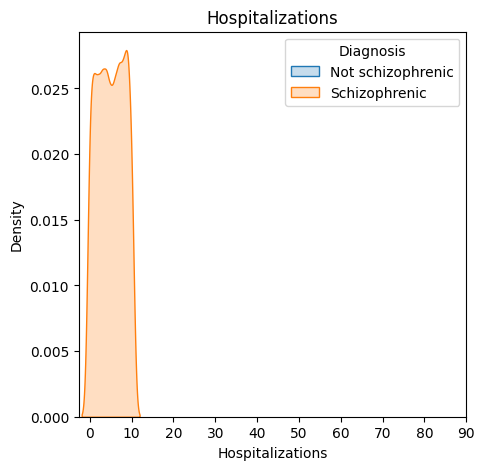

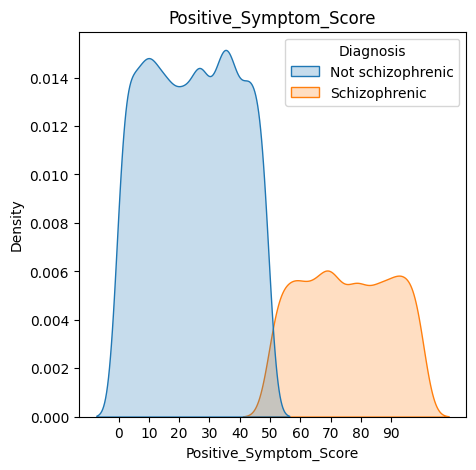

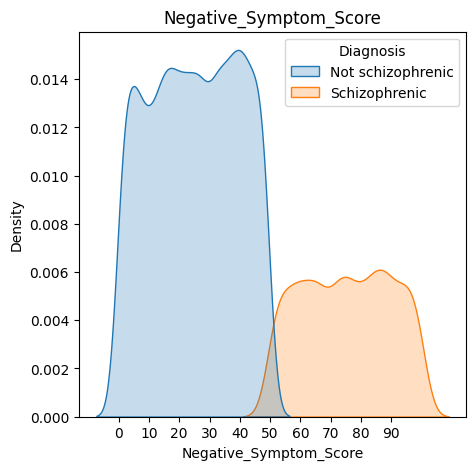

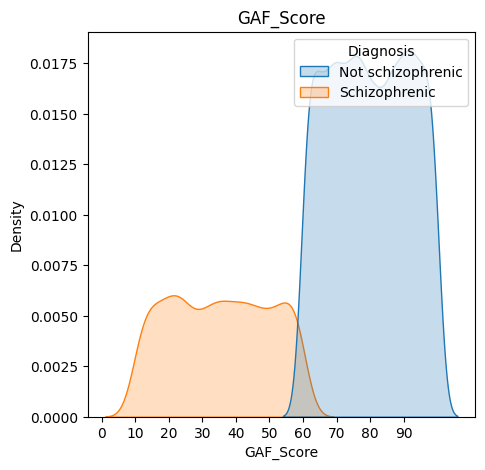

In [34]:
for i in numerical.columns:
    if i!="Patient_ID":
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=numerical,x=i,hue=categorical["Diagnosis"],fill=True)
        plt.xticks(range(0,100,10))
        plt.title(i)

* Disease_Duration of patients more than 0 years are mostly schizophrenic.
* Across all ages rate of non schizophrenic patients are more than schizophrenic.
* Hospitalizations is starting from negative possibly the data is skewed and chances of outliers are there.
* Barring some inviduals of positive symptoms score between 40-50 most of the poeple having scores more than 60 or more are schizophrenic.
* Contrary to what has proposed in dataset the people having higher negative_symptoms_score are schizophrenic.
* Barring some individuals of GAF_Score around 50-60 mostly people with lower GAF_Score are more prone to schizophrenia.


<Axes: >

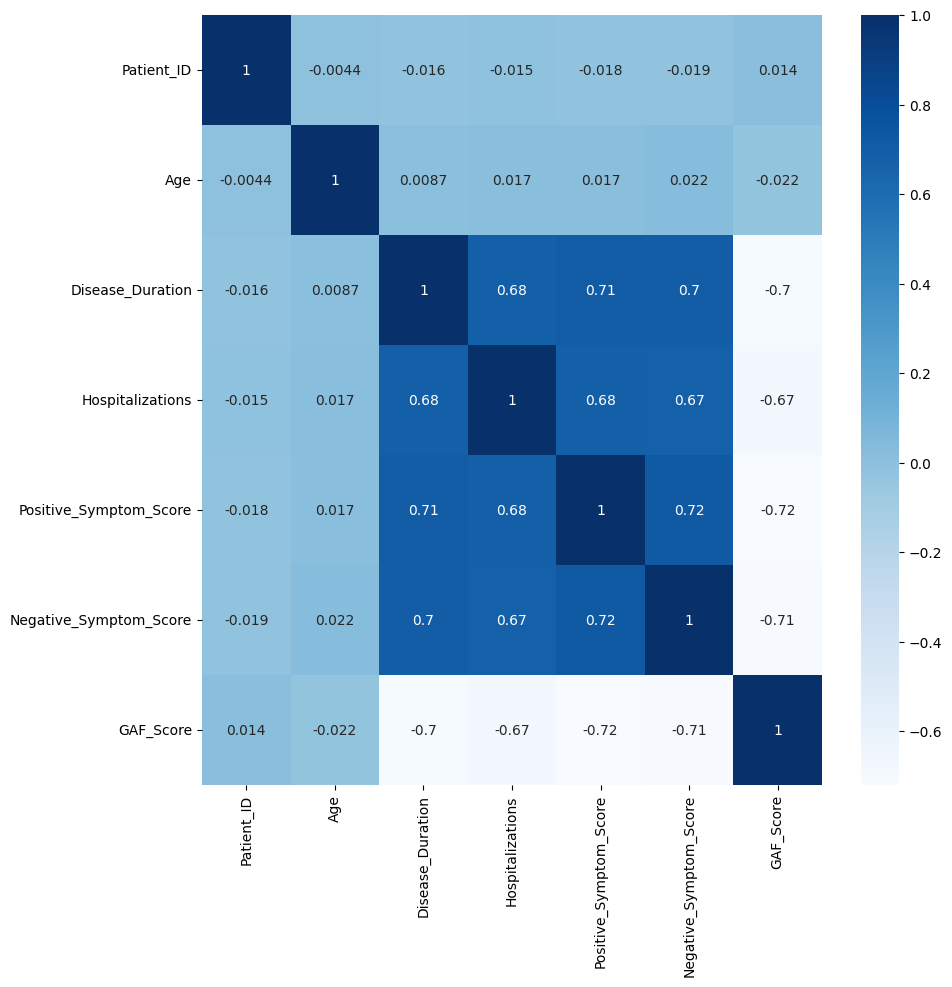

In [35]:
#Correlation test amongst continous variables 
plt.figure(figsize=(10,10))
sns.heatmap(numerical.corr(method='pearson'),annot=True,cmap="Blues")

* Disease_Duration,Hospitalizations,Positive_Symptom_Score and Negative_Symptom_Score are moderately correlated with themselves.
* GAF_Score is negatively correlated with all above features.
* Age and Patient_ID aren't correlated with any other features.

In [36]:
"""correlation test between categorical target variable and continous variables using 
point biserial correlation technique"""
import scipy.stats as stats
for i in numerical.columns:
    print(f"Correlation with respect to target for column {i}")
    print(stats.pointbiserialr(dataset["Diagnosis"],numerical[i]))

Correlation with respect to target for column Patient_ID
SignificanceResult(statistic=-0.014767020368656564, pvalue=0.13978344349612049)
Correlation with respect to target for column Age
SignificanceResult(statistic=0.019214583985947914, pvalue=0.054681856871665456)
Correlation with respect to target for column Disease_Duration
SignificanceResult(statistic=0.8310470753808284, pvalue=0.0)
Correlation with respect to target for column Hospitalizations
SignificanceResult(statistic=0.8005521891479488, pvalue=0.0)
Correlation with respect to target for column Positive_Symptom_Score
SignificanceResult(statistic=0.8469724600281965, pvalue=0.0)
Correlation with respect to target for column Negative_Symptom_Score
SignificanceResult(statistic=0.8439305222397917, pvalue=0.0)
Correlation with respect to target for column GAF_Score
SignificanceResult(statistic=-0.8472120818950329, pvalue=0.0)


* Features Disease_Duration,Hospitalizations,Positive_Symptom_Score and Negative_Symptom_Score are highly positively correlated with target feature "Diagnosis",
* GAF_Score is highly negatively correlated with target feature "Diagnosis".
* Since the continuous features have only moderate correlation between themselves so removing one of them will affect the predictive ability of the model since they are more strongly correlated with target feature.

In [37]:
# using cramers_v technique to test correlation between categorical target and feature variables
def cramers_v(confusion_matrix,col):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)
    print(f"Chi-value for column {col} :", chi2[0])
    print(f"P-value for column {col}:", chi2[1])
    n = confusion_matrix.sum()
    phi2 = chi2[0] / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [38]:
for i in categorical.columns:
    if i != 'Diagnosis':
        confusion_matrix=pd.crosstab(categorical[i],categorical["Diagnosis"],margins=True)
        print(f"Correlation value for column {i} : ",cramers_v(confusion_matrix.values,i))
        print()

Chi-value for column Gender : 0.19455099221646455
P-value for column Gender: 0.9955646549037677
Correlation value for column Gender :  0.0

Chi-value for column Education_level : 3.029370065830404
P-value for column Education_level: 0.9807244074871635
Correlation value for column Education_level :  0.0

Chi-value for column Marital_Status : 1.7761042540431922
P-value for column Marital_Status: 0.9871232806386376
Correlation value for column Marital_Status :  0.0

Chi-value for column Occupation : 2.9640860201797445
P-value for column Occupation: 0.9365910648756876
Correlation value for column Occupation :  0.0

Chi-value for column Income_level : 1.1372076350365738
P-value for column Income_level: 0.9798725883773505
Correlation value for column Income_level :  0.0

Chi-value for column Living_Area : 5.6312597211142155
P-value for column Living_Area: 0.22843030904988398
Correlation value for column Living_Area :  0.004515585901515705

Chi-value for column Family_History : 1525.346810262

* Almost all categorical variables have not much strong relationship to the target variable "Diagnosis".
* But amongst these categorical variables Family_History,Substance_Use,Suicide_Attempt and Medicinal_Adhreence has some significant p and chi2 values.

 ## DATA TRANSFORMATION

In [39]:
#Dropping irrelevant columns and splitting data into x and y
X = dataset.drop(columns = ["Patient_ID","Age","Gender","Education_level","Marital_Status","Occupation","Income_level","Living_Area","Social_Support","Stress_Factors","Diagnosis"],axis=1)
y = dataset["Diagnosis"]

In [40]:
#to handle skewness power transform the variables 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
transform_features = ["Disease_Duration","Hospitalizations","Positive_Symptom_Score","Negative_Symptom_Score","GAF_Score"]
X[transform_features] = scaler.fit_transform(X[transform_features])

Disease_Duration
Skew : 0.97


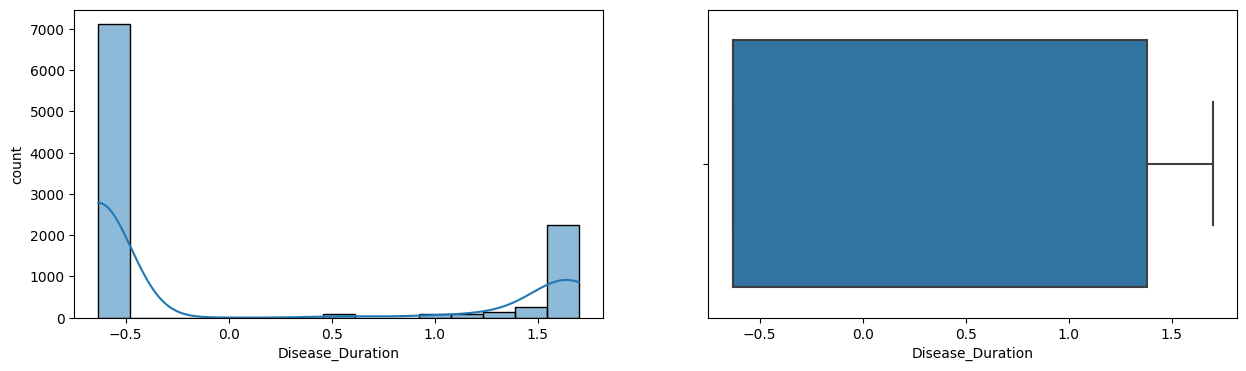

Hospitalizations
Skew : 1.11


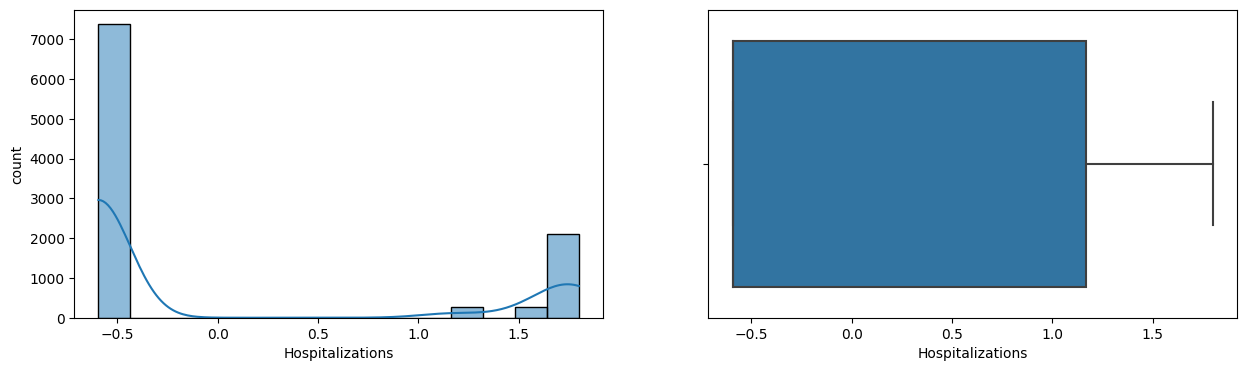

Positive_Symptom_Score
Skew : -0.13


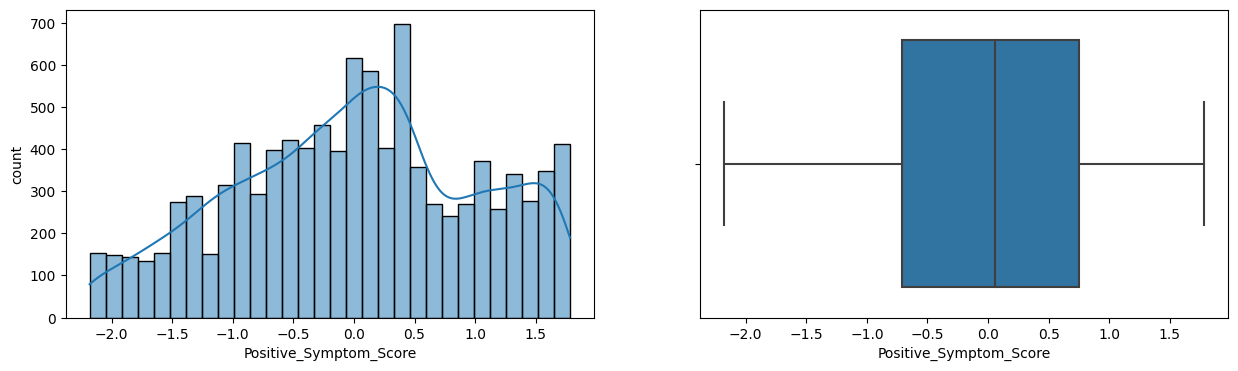

Negative_Symptom_Score
Skew : -0.13


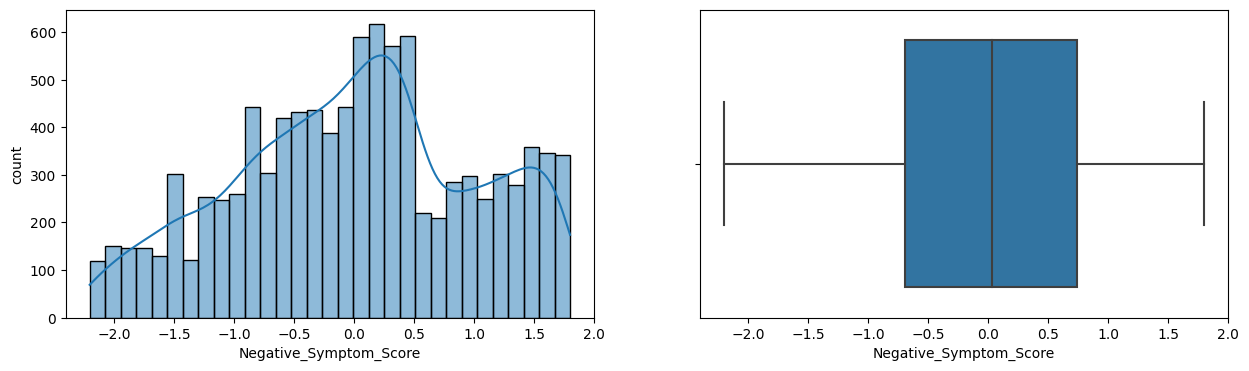

GAF_Score
Skew : -0.34


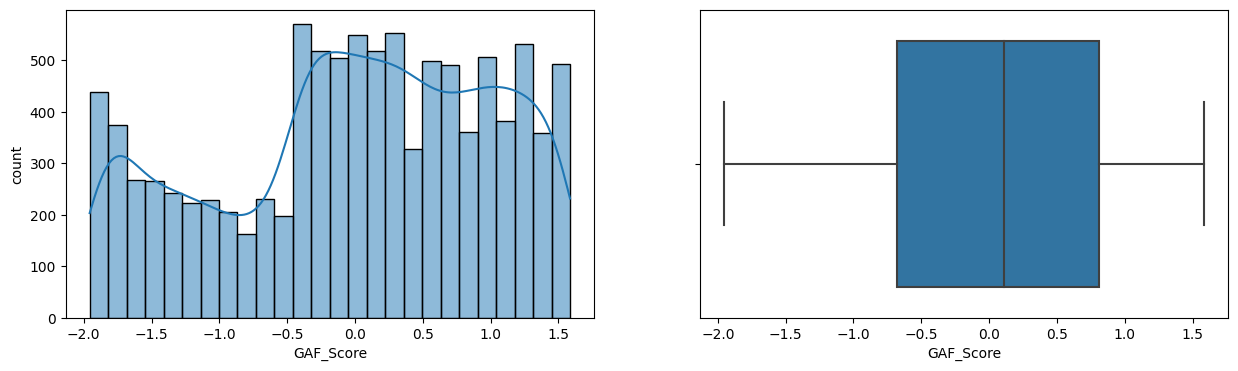

In [41]:
for col in transform_features:
    print(col)
    print('Skew :', round(X[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(X[col],kde=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X[col])
    plt.show()

* Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
* So Power Transformer with yeo-johnson can be used.
* All continous features are now at normal distribution.

In [42]:
#making stratified split to handle imbalance of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=24)

In [43]:
#scaling the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[transform_features] =  scaler.fit_transform(X_train[transform_features])
X_test[transform_features] =  scaler.transform(X_test[transform_features])

## MODEL BUILDING

In [44]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [45]:
#function to calculate evaluation metrics
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [46]:
#we will test major classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}


In [47]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train, y_train,X_test,y_test,models):
    '''
    This function takes in X and y and models dictionary as input
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    models_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        f1_score_list.append(model_test_f1)
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, precision_list, recall_list, f1_score_list)), columns=['Model Name', 'Precision','Recall','F1-score']).sort_values(by=['Recall'], ascending=False)
        
    return report

In [48]:
evaluate_models(X_train,y_train,X_test,y_test,models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Logistic Regression
Model performance for Training 

,Model Name,Precision,Recall,F1-score
0,Random Forest,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0
2,Gradient Boosting,1.0,1.0,1.0
3,Logistic Regression,1.0,1.0,1.0
4,K-Neighbors Classifier,1.0,1.0,1.0
5,XGBClassifier,1.0,1.0,1.0
6,CatBoosting Classifier,1.0,1.0,1.0
7,Support Vector Classifier,1.0,1.0,1.0
8,AdaBoost Classifier,1.0,1.0,1.0


Most of the models give 100% precision,recall and f1 score. Since it was an imbalanced dataset so these three metrics hold more importance than accuracy in order to avoid false positives.

Here we can use random forest for hyperparameter tuning and XGBClassifier in order to see whether it scores improves or not.

In [49]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

In [50]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
]

In [51]:
#using randomized CV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}


In [52]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 3},
 'RF': {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}}

In [53]:
#retraining the model with best parameters
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X_train,y_train,X_test,y_test,models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000




In [54]:
tuned_report

,Model Name,Precision,Recall,F1-score
0,Random Forest Classifier,1.0,1.0,1.0
1,XGBClassifier,1.0,1.0,1.0


Seems no improvement is there.

In [55]:
#making final prediction with best model
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'RF'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'RF'
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00       577

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



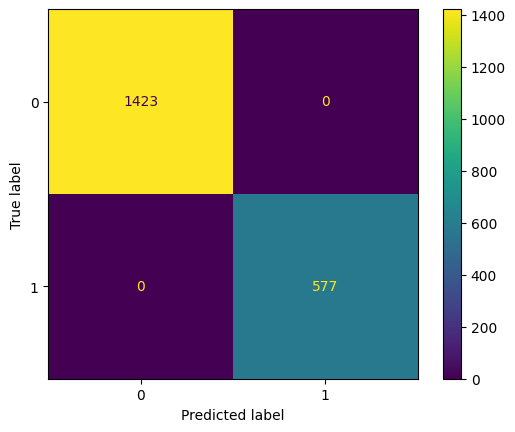

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

Inspite of having imbalance dataset the model is able to classify minority cases with 0 false positives and false negatives.

**Pls upvote the notebook if you like my analysis and provide your feedback in comments. Thank you.**